# Verification example
In this example, we investigate the verification example from the xARPES manuscript examples section.

The notebook also contains an execution of the Bayesian loop with a set of parameters that is "far from" the optimal solution, similar to the supplemental section on the example.

In the future, functionality will be added to xARPES for users to generate their own mock example, allowing for testing of desired hypotheses. 

In [4]:
%load_ext autoreload
%autoreload 2

# Necessary packages
import xarpes
import numpy as np
import matplotlib.pyplot as plt
import os

# Default plot configuration from xarpes.plotting.py
xarpes.plot_settings('default')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
script_dir = xarpes.set_script_dir()

dfld = 'data_sets'           # Folder containing the data
flnm = 'artificial_einstein' # Name of the file

In [ ]:
angl = np.load(os.path.join(script_dir, dfld, "verification_angles.npy"))
ekns = np.load(os.path.join(script_dir, dfld, "verification_kinergies.npy"))
intn = np.load(os.path.join(script_dir, dfld, "verification_intensities.npy"))

In [13]:
bmap = xarpes.BandMap.from_np_arrays(intensities=intn, angles=angl, ekin=ekns,
        energy_resolution=0.0025, angle_resolution=0.1, temperature=10)


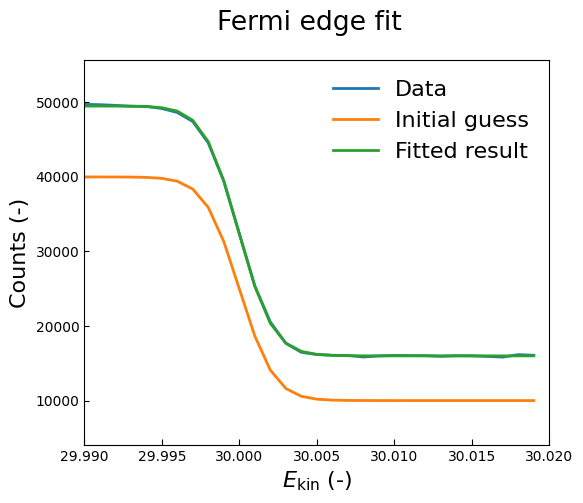

The optimised hnu - Phi=29.9999 +/- 0.00002 eV.


In [14]:
%matplotlib inline

fig = plt.figure(figsize=(6, 5)); ax = fig.gca()

fig = bmap.fit_fermi_edge(hnuminPhi_guess=30, background_guess=1e4,
                          integrated_weight_guess=3e4, angle_min=-6,
                          angle_max=10, ekin_min=29.99, ekin_max=30.02,
                          ax=ax, show=True, fig_close=True,
                          title='Fermi edge fit')

print('The optimised hnu - Phi=' + f'{bmap.hnuminPhi:.4f}' + ' +/- '
      + f'{1.96 * bmap.hnuminPhi_std:.5f}' + ' eV.')

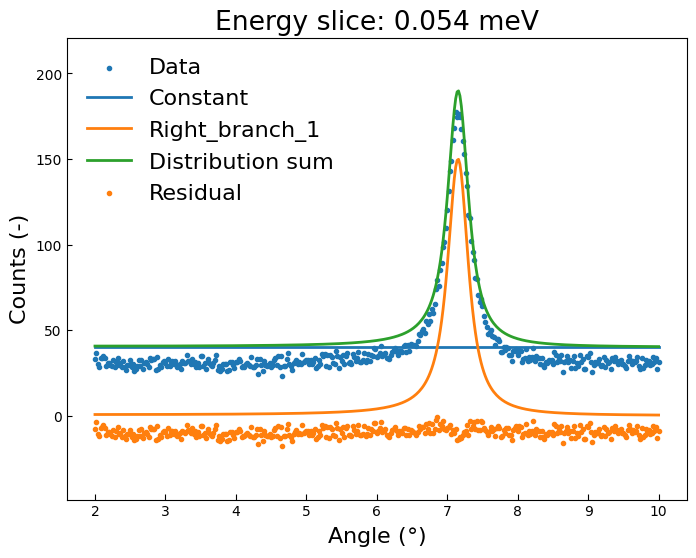

In [15]:
%matplotlib inline

angle_min = 2
angle_max = 10

energy_range = [-0.08, 0.0001]
energy_value = 0.0

k_0 = 0.1

mdcs = xarpes.MDCs(*bmap.mdc_set(angle_min, angle_max, energy_range=energy_range))

guess_dists = xarpes.CreateDistributions([
xarpes.Constant(offset=40),
xarpes.SpectralQuadratic(amplitude=0.25, peak=5.1, broadening=0.0005,
            center_wavevector=k_0, name='Right_branch', index='1')
])

fig = plt.figure(figsize=(8, 6)); ax = fig.gca()

fig = mdcs.visualize_guess(distributions=guess_dists, energy_value=energy_value, ax=ax)

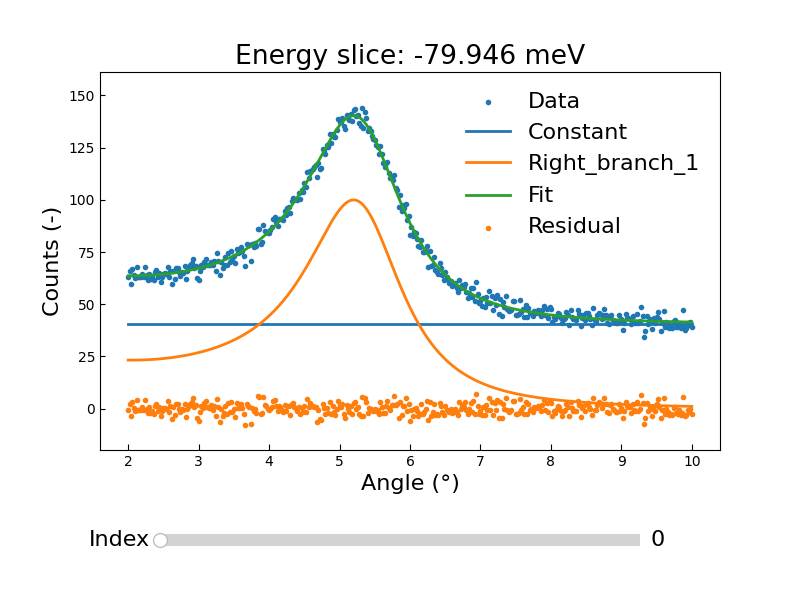

In [16]:
%matplotlib widget    

fig = plt.figure(figsize=(8, 6)); ax = fig.gca()

fig = mdcs.fit_selection(distributions=guess_dists, ax=ax)

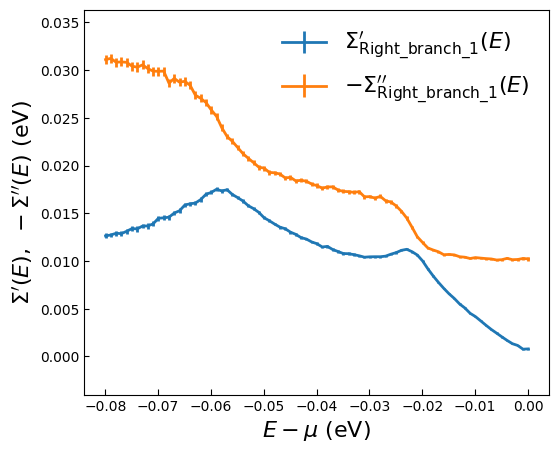

In [17]:
%matplotlib inline

fig = plt.figure(figsize=(6, 5)); ax = fig.gca()

# bare_mass=1.602 | fermi_wavevector=0.2739

# 1.5960309075, fermi_wavevector=0.250010325

self_energy = xarpes.SelfEnergy(*mdcs.expose_parameters(select_label='Right_branch_1', 
                                bare_mass=1.5960309075, fermi_wavevector=0.250010325, side='right'))

fig = self_energy.plot_both(ax=ax)

plt.show()

/home/tvanwaas/projects/xARPES/xarpes/plotting.py:72: UserWarning: Conversion from angle to momenta causes warping of the cell centers. 
 Cell edges of the mesh plot may look irregular.
  result = func(*args, **kwargs)


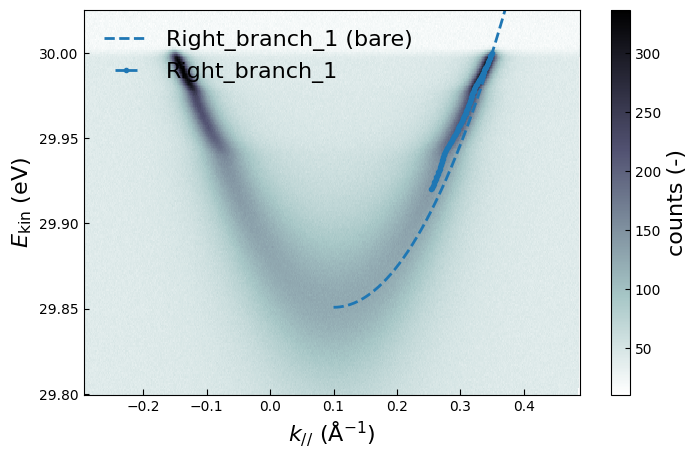

In [18]:
%matplotlib inline

self_energies = xarpes.CreateSelfEnergies([self_energy])

fig = plt.figure(figsize=(8, 5)); ax = fig.gca()

fig = bmap.plot(abscissa='momentum', ordinate='kinetic_energy', 
                plot_dispersions='domain', 
                self_energies=self_energies, ax=ax)

Dimensionality has been reduced from a matrix of rank 156 to 122 in the singular space.


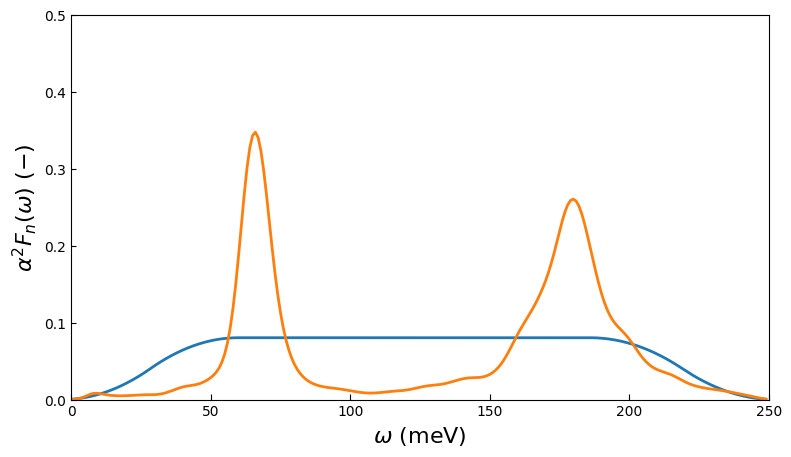

In [19]:
%matplotlib inline

spectrum, model = self_energy.extract_a2f(omega_min=1.0, omega_max=80, 
        omega_num=250, omega_I=20, omega_M=60, alpha_min=1.5, alpha_num=10,
        alpha_max=9.5, lambda_el=0.1132858, impurity_magnitude=10.041243,
        h_n=0.0803366)

plt.figure(figsize=(9, 5))
plt.xlim([0, 250]); plt.ylim([0, 0.5])
plt.xlabel(r'$\omega$ (meV)')
plt.ylabel(r'$\alpha^2F_n(\omega)~(-)$')
plt.plot(model); plt.plot(spectrum)
plt.show()

In the following cell, we start from the optimal solution. Unsurprisingly, the optimal solution is obtained after just a couple of iterations.

In [21]:
cost, spectrum, model, alpha_select, params = self_energy.bayesian_loop(omega_min=1.0,
            omega_max=80, omega_num=250, omega_I=20, omega_M=60,
            alpha_min=3.0, alpha_max=11.0, bare_mass=1.597636665, fermi_wavevector=0.2499774217, 
            h_n=0.081811739, impurity_magnitude=10.0379498, lambda_el=0.1054932517,
            vary=("impurity_magnitude", "lambda_el", "fermi_wavevector", "bare_mass", "h_n"), 
            scale_mb=0.01, scale_imp=0.1, scale_kF=0.001,
            scale_lambda_el=0.1, scale_hn=0.1)

Dimensionality has been reduced from a matrix of rank 156 to 122 in the singular space.
Iter    1 | cost = -5.1735e+02 | bare_mass=1.5976367 | fermi_wavevector=0.24997742 | h_n=0.081811739 | impurity_magnitude=10.03795 | lambda_el=0.10549325
Iter    2 | cost = -5.1735e+02 | bare_mass=1.5976367 | fermi_wavevector=0.24997742 | h_n=0.081811739 | impurity_magnitude=10.037975 | lambda_el=0.10549325
Iter    3 | cost = -5.1734e+02 | bare_mass=1.5976367 | fermi_wavevector=0.24997742 | h_n=0.081811739 | impurity_magnitude=10.03795 | lambda_el=0.10551825
Iter    4 | cost = -5.1735e+02 | bare_mass=1.5976367 | fermi_wavevector=0.24997767 | h_n=0.081811739 | impurity_magnitude=10.03795 | lambda_el=0.10549325
Iter    5 | cost = -5.1735e+02 | bare_mass=1.5976392 | fermi_wavevector=0.24997742 | h_n=0.081811739 | impurity_magnitude=10.03795 | lambda_el=0.10549325
Iter    6 | cost = -5.1734e+02 | bare_mass=1.5976367 | fermi_wavevector=0.24997742 | h_n=0.081836739 | impurity_magnitude=10.03795 | lambda_e

In the following cell, we start from a much less probable solution, showing that

The optimisation has been tested against Python v3.10.12, NumPy v2.2.6, and SciPy v1.15.3. Other combinations of these packages still have to be tested.

In [22]:
cost, spectrum, model, alpha_select, params = self_energy.bayesian_loop(omega_min=1.0,
            omega_max=80, omega_num=250, omega_I=20, omega_M=60,
            alpha_min=3.0, alpha_max=11.0, bare_mass=1.74625, fermi_wavevector=0.250125,
            h_n=0.09, impurity_magnitude=9.1, lambda_el=0.22, sigma_svd=0.1,
            vary=("impurity_magnitude", "lambda_el", "fermi_wavevector", "bare_mass", "h_n"), 
            converge_iters=100, tole=1e-8, scale_mb=0.1, scale_imp=1.0, scale_kF=0.001,
            scale_lambda_el=0.1, scale_hn=0.01)

Dimensionality has been reduced from a matrix of rank 156 to 58 in the singular space.
Iter    1 | cost =  5.3786e+04 | bare_mass=1.74625 | fermi_wavevector=0.250125 | h_n=0.09 | impurity_magnitude=9.1 | lambda_el=0.22
Iter    2 | cost =  5.3786e+04 | bare_mass=1.74625 | fermi_wavevector=0.250125 | h_n=0.09 | impurity_magnitude=9.10025 | lambda_el=0.22
Iter    3 | cost =  5.3808e+04 | bare_mass=1.74625 | fermi_wavevector=0.250125 | h_n=0.09 | impurity_magnitude=9.1 | lambda_el=0.220025
Iter    4 | cost =  5.3779e+04 | bare_mass=1.74625 | fermi_wavevector=0.25012525 | h_n=0.09 | impurity_magnitude=9.1 | lambda_el=0.22
Iter    5 | cost =  5.3806e+04 | bare_mass=1.746275 | fermi_wavevector=0.250125 | h_n=0.09 | impurity_magnitude=9.1 | lambda_el=0.22
Iter    6 | cost =  5.3787e+04 | bare_mass=1.74625 | fermi_wavevector=0.250125 | h_n=0.0900025 | impurity_magnitude=9.1 | lambda_el=0.22
Iter    7 | cost =  5.3770e+04 | bare_mass=1.74626 | fermi_wavevector=0.2501251 | h_n=0.090001 | impurity

Following the recommended procedure, we perform a final optimisation with very tight criteria, for the purpose of further narrowing down the solution.

The solution should be marginally closer to the true solution for bare_mass, impurity_magnitude, and lambda_el.

In [23]:
cost, spectrum, model, alpha_select, params = self_energy.bayesian_loop(omega_min=1.0,
            omega_max=80, omega_num=250, omega_I=20, omega_M=60,
            alpha_min=1.0, alpha_max=9.0, sigma_svd=1e-4,
            bare_mass=1.597636093, fermi_wavevector=0.2499774208, 
            h_n=0.08181151626, impurity_magnitude=10.03795642, lambda_el=0.1054945571,
            vary=("impurity_magnitude", "lambda_el", "fermi_wavevector", "bare_mass", "h_n"), 
            converge_iters=100, tole=1e-8, scale_mb=0.1, scale_imp=0.1, scale_kF=0.01,
            scale_lambda_el=0.1, scale_hn=0.1)

Dimensionality has been reduced from a matrix of rank 156 to 122 in the singular space.
Iter    1 | cost = -4.4650e+02 | bare_mass=1.5976361 | fermi_wavevector=0.24997742 | h_n=0.081811516 | impurity_magnitude=10.037956 | lambda_el=0.10549456
Iter    2 | cost = -4.4650e+02 | bare_mass=1.5976361 | fermi_wavevector=0.24997742 | h_n=0.081811516 | impurity_magnitude=10.037981 | lambda_el=0.10549456
Iter    3 | cost = -4.4654e+02 | bare_mass=1.5976361 | fermi_wavevector=0.24997742 | h_n=0.081811516 | impurity_magnitude=10.037956 | lambda_el=0.10551956
Iter    4 | cost = -4.4606e+02 | bare_mass=1.5976361 | fermi_wavevector=0.24997992 | h_n=0.081811516 | impurity_magnitude=10.037956 | lambda_el=0.10549456
Iter    5 | cost = -4.4648e+02 | bare_mass=1.5976611 | fermi_wavevector=0.24997742 | h_n=0.081811516 | impurity_magnitude=10.037956 | lambda_el=0.10549456
Iter    6 | cost = -4.4665e+02 | bare_mass=1.5976361 | fermi_wavevector=0.24997742 | h_n=0.081836516 | impurity_magnitude=10.037956 | lam